# Homework

## CNN
Multiclass classify lowercase alphabet images。<br>
Fill in the model creation and execute it properly, and check the results.<br>
Read and use necessary libraries as needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
import io
import glob

### About dataset

#### Data description

# 新しいセクション

HandDB_Lower_Alphabet.npz records images and their correct labels in lowercase a to z.<br>
This image was created from online character and is 32x32 in size.

#### Loading data

In [2]:
!wget "https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ" -O HandDB_Lower_Alphabet.npz

--2025-05-10 13:27:13--  https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ
Resolving drive.google.com (drive.google.com)... 64.233.189.101, 64.233.189.100, 64.233.189.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ&export=download [following]
--2025-05-10 13:27:13--  https://drive.usercontent.google.com/download?id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.203.132, 2404:6800:4008:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1030317 (1006K) [application/octet-stream]
Saving to: ‘HandDB_Lower_Alphabet.npz’

HandDB_Lower_Alphab 100%[===================>]   100

In [3]:
data = np.load('HandDB_Lower_Alphabet.npz', allow_pickle=True)
X = data['x']
y = data['y']
n2c = data['n2c'].item()

#### View data

Number of targets: 26


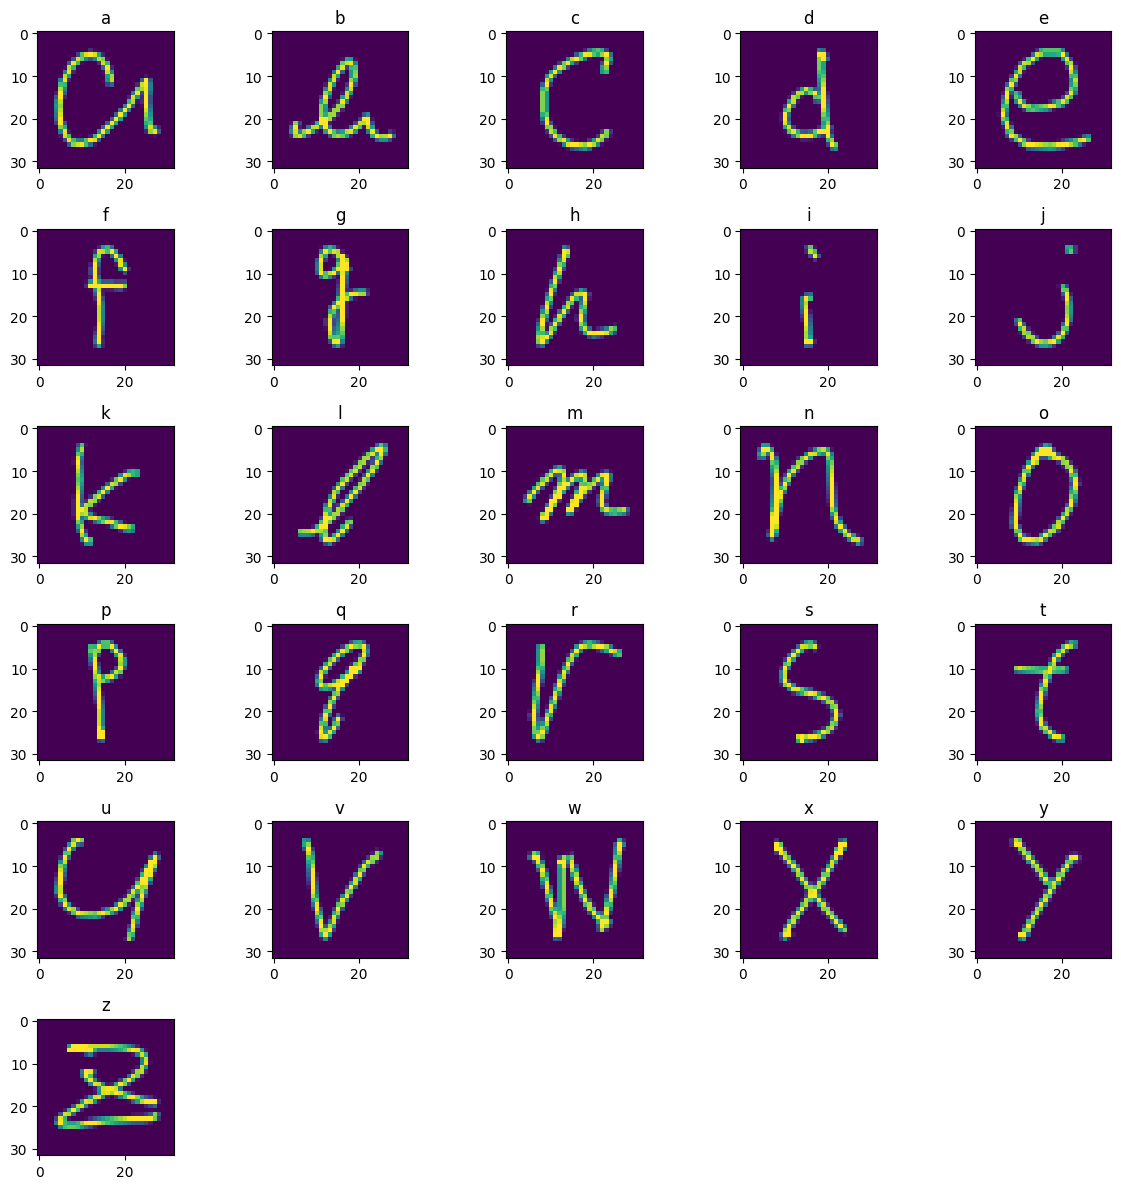

In [4]:
n_target = max(y)+1
print("Number of targets:", n_target)
fig = plt.figure(figsize=(12, 12))
for i in range(n_target):
  ax = fig.add_subplot(6, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].reshape(X.shape[1], X.shape[2]))
  ax.set_title(n2c[i])
plt.tight_layout()

#### Data normalization

In [5]:
X /= 255

In [6]:
from keras import backend as K
img_rows, img_cols, img_channels = X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

#### Split into training and test data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### About the model

#### Parameters
* Adjust the parameters yourself and see the changes

In [9]:
batch_size = 128
num_classes = len(n2c)
epochs = 20

#### Model creation
* Create a CNN model. See what happens when you change layers.
* Check the change by Loss and Optimizer at compile time.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 将标签转换为独热编码
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 创建模型
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax') # 输出层
])

# 编译模型
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
    )

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317,210 (1.21 MB)

 Trainable params: 317,210 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

#### Model visualization

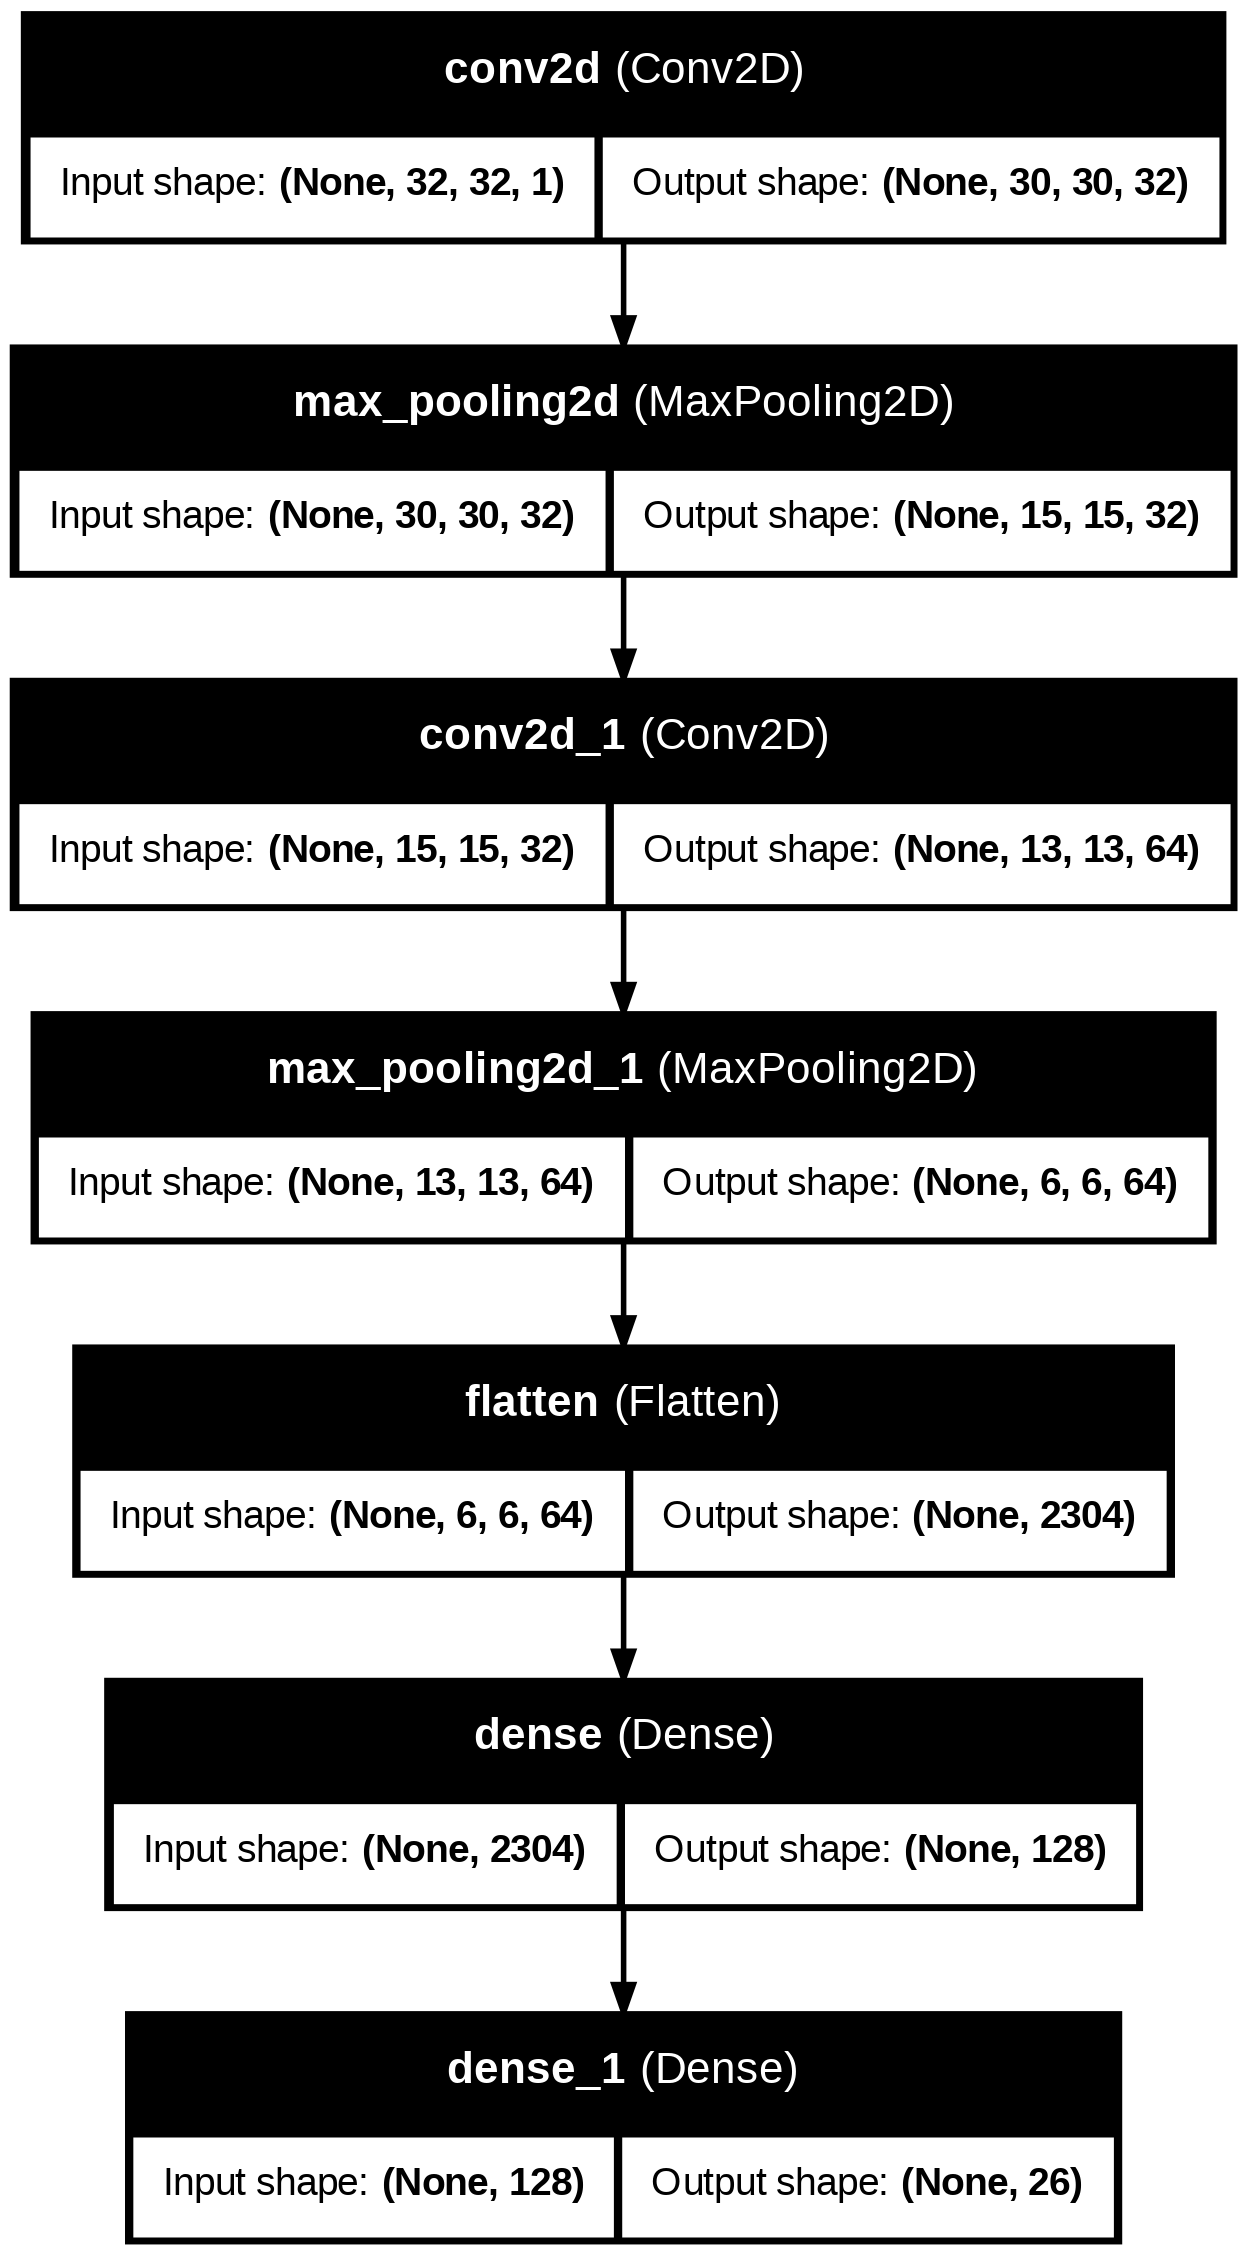

In [12]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

#### Learning the model

In [13]:
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.2230 - loss: 2.9788 - val_accuracy: 0.6714 - val_loss: 1.4256
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.7264 - loss: 1.0637 - val_accuracy: 0.8083 - val_loss: 0.7577
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.8469 - loss: 0.5749 - val_accuracy: 0.8292 - val_loss: 0.6824
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8649 - loss: 0.4999 - val_accuracy: 0.8618 - val_loss: 0.5000
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.9023 - loss: 0.3205 - val_accuracy: 0.8814 - val_loss: 0.4235
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9244 - loss: 0.2542 - val_accuracy: 0.8918 - val_loss: 0.3762
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9394 - loss: 0.1981 - val_accuracy: 0.9087 - val_loss: 0.3543
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9609 - loss: 0.1504 - val_accuracy: 0.

### About result

#### Accuracy for test data

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3396356701850891
Test accuracy: 0.9256845116615295


#### Visualize the learning process

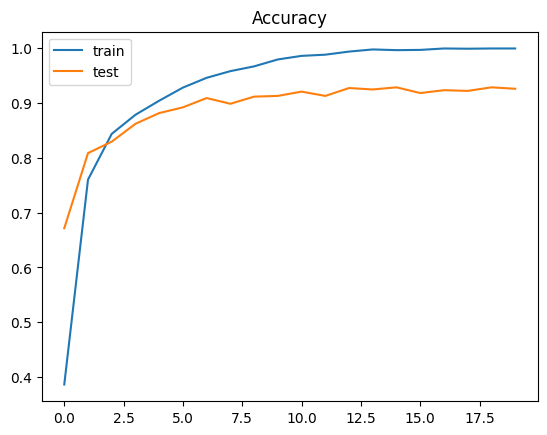

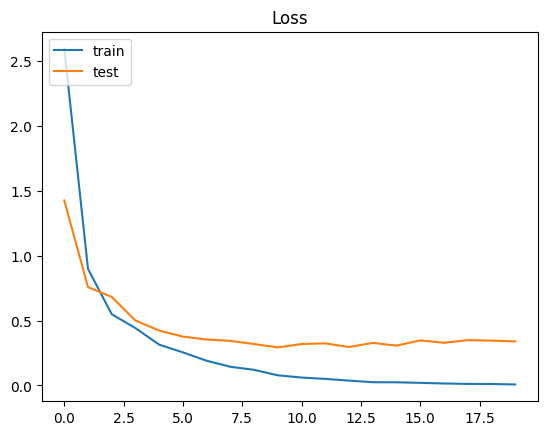

In [15]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


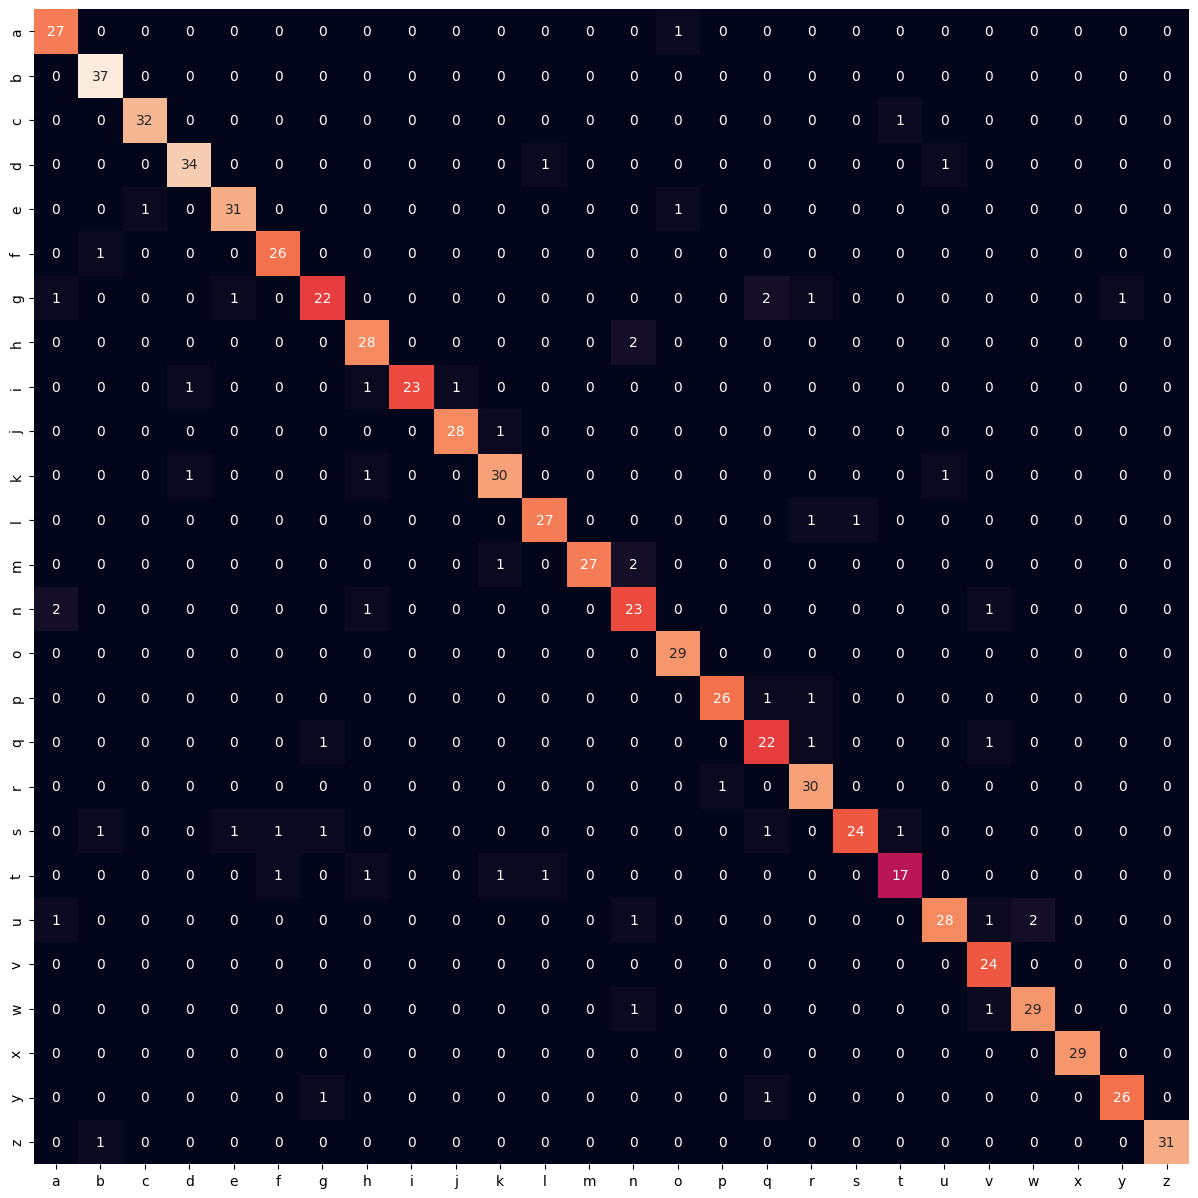

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 将y_test从独热编码格式转换为整数标签
y_test_labels = np.argmax(y_test, axis=1)

predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test_labels, predicted)
df_cmx = pd.DataFrame(cmx, index=n2c.values(), columns=n2c.values())
plt.figure(figsize = (15,15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")
plt.show()

## RNN
Identify the signature data of the online characters as the person or another person.(Signature Verification)<br>
In writer authentication, a model is created for each user, and the user is classified as a binary.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, re, glob, gc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve

### About dataset

#### Data description

SVC2004_Task1_5users.npz records signature data of five online characters.<br>
The online characters are padded with -1 to fill in the missing parts to make them all the same length.<br>
The following data is recorded in addition to the online character data.
* Target user
* Written or fake by another person
* Actual data length

The following data is recorded in online character data.
* Stroke Number - current stroke number (if -1, pen-up state)
* X-coordinate - scaled cursor position along the x-axis
* Y-coordinate - scaled cursor position along the y-axis
* Time stamp - system time at which the event was posted

#### Loading data

In [43]:
!wget "https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z" -O SVC2004_Task1_5users.npz

--2025-05-10 13:34:33--  https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z
Resolving drive.google.com (drive.google.com)... 74.125.204.100, 74.125.204.139, 74.125.204.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z&export=download [following]
--2025-05-10 13:34:33--  https://drive.usercontent.google.com/download?id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.170.132, 2404:6800:4008:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.170.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360007 (352K) [application/octet-stream]
Saving to: ‘SVC2004_Task1_5users.npz’

SVC2004_Task1_5user 100%[===================>] 351.57

In [45]:
data = np.load("SVC2004_Task1_5users.npz")

In [46]:
X = data["x"]
user = data["user"]
genuine = data["genuine"]
X_length = data["x_length"]

In [47]:
num_user = max(user) + 1
timesteps, features = X.shape[-2:]
scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X])
print("Number of Users:", num_user)
print("Timesteps:", timesteps)
print("Features:", features)

Number of Users: 5
Timesteps: 784
Features: 4


#### View data

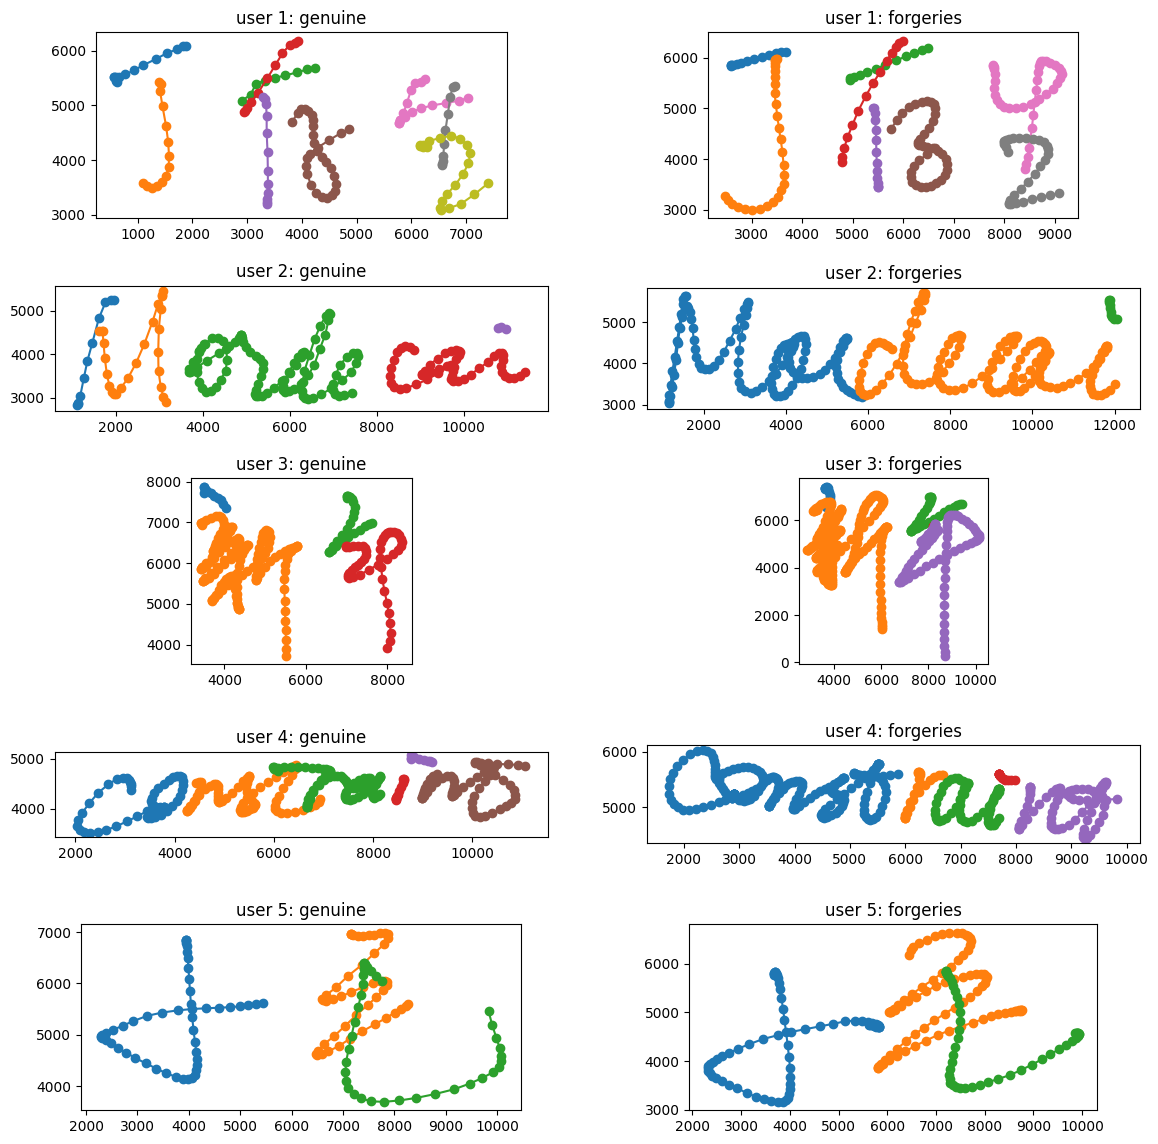

In [48]:
fig = plt.figure(figsize=(14, 14))
for i in range(num_user):
  for j in range(2):
    data = X[user==i][j*20]
    n_stroke = data[:, 0].max()
    ax = fig.add_subplot(5, 2, i*2+j+1)
    for i_stroke in range(n_stroke+1):
      ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o')
      ax.set_title(f'user {i+1}: {"genuine" if j == 0 else "forgeries"}')
      ax.set_aspect('equal')

### Required functions

#### Function to reset keras

In [49]:
def reset_keras():
    K.clear_session()
    gc.collect()

#### Function to get EER (Equal Error Rate)

In [50]:
def get_eer(y_true, y_score):
    y_true = np.asarray(y_true).flatten()
    y_score = np.asarray(y_score).flatten()
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.abs(fpr - fnr))]
    eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
    return eer

### About the model

#### Model creation
* RCreate an RNN model. Check the change when the structure is changed.
* Check the change by Loss and Optimizer at compile time.

Bidirectional LSTM<br>
https://keras.io/examples/imdb_bidirectional_lstm/<br>
Stacked LSTM<br>
https://keras.io/getting-started/sequential-model-guide/#stacked-lstm-for-sequence-classification<br>

In [51]:
def build_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    return model

#### Hyper parameters
* Adjust the parameters yourself and see the changes

In [52]:
batch_size = 64
epochs = 100

#### Learning the model

In [53]:
train_EER_list = []
test_EER_list = []
test_size = 0.2

for user_index in range(num_user):
    print(f"Training for user {user_index + 1}/{num_user}")

    # 获取当前用户的数据
    mask = user == user_index
    X_user = X_scaled[mask]
    y_user = genuine[mask]

    # 划分训练/测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X_user, y_user,
        test_size=test_size,
        random_state=42,
        shuffle=True,
        stratify=y_user
    )

    # 重置Keras会话
    reset_keras()

    # 构建并训练模型
    model = build_model(input_shape=(timesteps, features))
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[early_stop, reduce_lr]
    )

    # 预测并计算EER
    pred_train = model.predict(X_train).flatten()
    pred_test = model.predict(X_test).flatten()

    train_eer = get_eer(y_train, pred_train)
    test_eer = get_eer(y_test, pred_test)

    print(f"Train EER: {train_eer * 100:.2f}%")
    print(f"Test  EER: {test_eer * 100:.2f}%")

    train_EER_list.append(train_eer * 100)
    test_EER_list.append(test_eer * 100)

    del model
    reset_keras()
    print()

Training for user 1/5
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7122 - val_accuracy: 0.5000 - val_loss: 0.6967 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6834 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step - accuracy: 0.5000 - loss: 0.6871 - val_accuracy: 0.5000 - val_loss: 0.6746 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step - accuracy: 0.5000 - loss: 0.6801 - val_accuracy: 0.5000 - val_loss: 0.6690 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6754 - val_accuracy: 0.5000 - val_loss: 0.6655 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6721 - val_accuracy: 0.5000 - val_loss: 0.6628 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6694 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
Train EER: 0.00%
Test  EER: 0.00%

Training for user 3/5
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7031 - val_accuracy: 0.5000 - val_loss: 0.6873 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step - accuracy: 0.5000 - loss: 0.6890 - val_accuracy: 0.5000 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step - accuracy: 0.5000 - loss: 0.6823 - val_accuracy: 0.5000 - val_loss: 0.6697 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.6617 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6728 - val_accuracy: 0.5000 - val_loss: 0.6521 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step - accuracy: 0.5000 - loss: 0.6660 - val_accuracy: 0.5000 - val_loss: 0.6410 - learning_rate: 0.0010
Epoch 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Train EER: 0.00%
Test  EER: 0.00%

Training for user 4/5
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7052 - val_accuracy: 0.5000 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6875 - val_accuracy: 0.5000 - val_loss: 0.6879 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6826 - val_accuracy: 0.5000 - val_loss: 0.6830 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6765 - val_accuracy: 0.5000 - val_loss: 0.6765 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - accuracy: 0.5000 - loss: 0.6693 - val_accuracy: 0.5000 - val_loss: 0.

### About result

#### Evaluation of accuracy

In [54]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 6.25
Average Test EER(%): 5.0
